<a href="https://colab.research.google.com/github/ElizabethWaithera/Machine_learning/blob/main/Tensorflow_keras_sequential_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Relevant Libraries

In [1]:
!pip install tensorflow
!pip install scikeras
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import Sequential, regularizers
from tensorflow.keras.layers import Dense, Dropout


from scikeras.wrappers import KerasClassifier, KerasRegressor
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier


In [2]:
df = pd.read_csv('data.csv')
df

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
0,0,1.0,-1.067,-1.114,-0.616,0.376,1.090,0.467,-0.422,0.460,...,0.220,-0.339,0.254,-0.179,0.352,0.125,0.347,0.436,0.958,-0.824
1,1,0.0,-0.831,0.271,1.716,1.096,1.731,-0.197,1.904,-0.265,...,-0.765,-0.735,-1.158,2.554,0.856,-1.506,0.462,-0.029,-1.932,-0.343
2,2,0.0,0.099,1.390,-0.732,-1.065,0.005,-0.081,-1.450,0.317,...,-1.311,0.799,-1.001,1.544,0.575,-0.309,-0.339,-0.148,-0.646,0.725
3,3,1.0,-0.989,-0.916,-1.343,0.145,0.543,0.636,1.127,0.189,...,-1.370,1.093,0.596,-0.589,-0.649,-0.163,-0.958,-1.081,0.805,3.401
4,4,0.0,0.811,-1.509,0.522,-0.360,-0.220,-0.959,0.334,-0.566,...,-0.178,0.718,-1.017,1.249,-0.596,-0.445,1.751,1.442,-0.393,-0.643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,245,1.0,-0.068,-0.184,-1.153,0.610,0.414,1.557,-0.234,0.950,...,1.492,1.430,-0.333,-0.200,-1.073,0.797,1.980,1.191,1.032,-0.402
246,246,0.0,-0.234,-1.373,-2.050,-0.408,-0.255,0.784,0.986,-0.891,...,-0.996,0.678,1.395,0.714,0.215,-0.537,-1.267,-1.021,0.747,0.128
247,247,0.0,-2.327,-1.834,-0.762,0.660,-0.858,-2.764,-0.539,-0.065,...,-1.237,-0.620,0.670,-2.010,0.438,1.972,-0.379,0.676,-1.220,-0.855
248,248,1.0,-0.451,-0.204,-0.762,0.261,0.022,-1.487,-1.122,0.141,...,0.729,0.411,2.366,-0.021,0.160,0.045,0.208,-2.117,-0.546,-0.093


In [3]:
# Replace None with appropriate code

# Read in the data
df = pd.read_csv("data.csv")

# Drop the "id" column
df.drop(columns=["id"], inplace=True)

# Separate into X and y
X = df.drop(columns=["target"])
y = df["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2021)

X_train.shape

(187, 300)

## Instatiaie a Sequential Model

used as a foundation to construct a neural network by adding layers such as Dense layers, Convolutional layers, etc., in subsequent steps.

In [4]:
dense_model = Sequential(name ='dense')

In [5]:
num_input_nodes = 300
num_output_nodes = 1
#the input nodes reprsnet the number of features in the model and output nodes represents the number of outputs or taget they help in defining the structure of the neural network
dense_model.add(Dense(units = 64, input_shape = (num_input_nodes,)))
dense_model.add(Dense(units= 64))
dense_model.add(Dense(units =64))
dense_model.layers
#the 64 units specifies the number of neuron and repeating means that you're addin more capacity for the neural network to learn from the data


In [6]:
activation_function = 'sigmoid'
#the activation function introduces non linearility to the neural neetwork which enable it to learn compleex relationships in the data otherwhise the model could be linear
#in our case this is a binary problem therefore sigmoid is the best choice as it squashes the final output in the last hiddeen layer to either 1 or 0

In [7]:
#add the output layer
dense_model.add(Dense(units = num_output_nodes, activation = activation_function))

#Detrmine the appropriate loss function
if num_output_nodes == 1:
  loss = "binary_crossentropy"
else:
  loss = "categorical_crossentropy"


#compile the model
dense_model.compile(
    optimizer = 'adam',
    loss=loss,
    metrics = ['accuracy']
)
#Get the model sumary
dense_model.summary()



Model: "dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                19264     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 27649 (108.00 KB)
Trainable params: 27649 (108.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
#fit the training data to the model
dense_model_results = dense_model.fit(
    x = X_train,
    y = y_train,
    batch_size =None,
    verbose = 1,
    epochs = 20,
    validation_split = 0.4,
    shuffle = False

)

Epoch 1/20
4/4 [==============================] - 2s 111ms/step - loss: 1.0405 - accuracy: 0.5000 - val_loss: 1.1091 - val_accuracy: 0.4133
Epoch 2/20
4/4 [==============================] - 0s 25ms/step - loss: 0.5027 - accuracy: 0.7589 - val_loss: 1.0218 - val_accuracy: 0.4133
Epoch 3/20
4/4 [==============================] - 0s 28ms/step - loss: 0.3144 - accuracy: 0.8750 - val_loss: 1.0030 - val_accuracy: 0.4533
Epoch 4/20
4/4 [==============================] - 0s 30ms/step - loss: 0.2115 - accuracy: 0.9554 - val_loss: 1.0369 - val_accuracy: 0.4933
Epoch 5/20
4/4 [==============================] - 0s 21ms/step - loss: 0.1434 - accuracy: 0.9821 - val_loss: 1.1104 - val_accuracy: 0.5067
Epoch 6/20
4/4 [==============================] - 0s 21ms/step - loss: 0.0923 - accuracy: 1.0000 - val_loss: 1.2128 - val_accuracy: 0.5200
Epoch 7/20
4/4 [==============================] - 0s 26ms/step - loss: 0.0553 - accuracy: 1.0000 - val_loss: 1.3320 - val_accuracy: 0.5200
Epoch 8/20
4/4 [==========

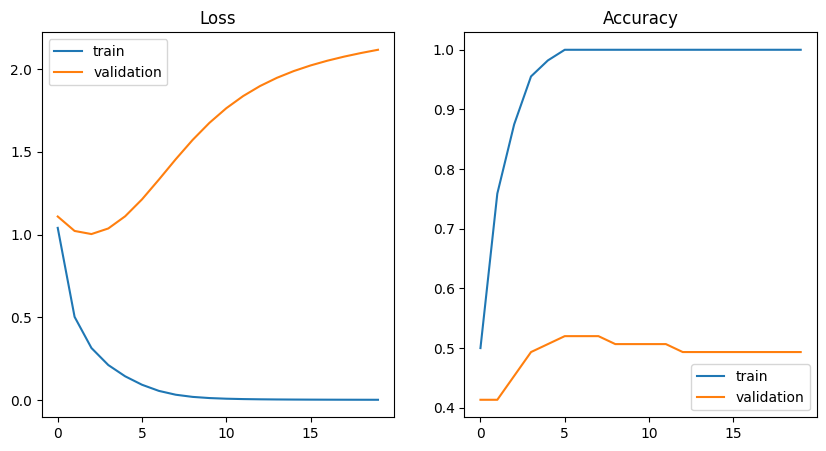

In [9]:
# Run this cell without changes

def plot_loss_and_accuracy(results, final=False):

    if final:
        val_label="test"
    else:
        val_label="validation"

    # Extracting metrics from model fitting
    train_loss = results.history['loss']
    val_loss = results.history['val_loss']
    train_accuracy = results.history['accuracy']
    val_accuracy = results.history['val_accuracy']

    # Setting up plots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    # Plotting loss info
    ax1.set_title("Loss")
    sns.lineplot(x=results.epoch, y=train_loss, ax=ax1, label="train")
    sns.lineplot(x=results.epoch, y=val_loss, ax=ax1, label=val_label)
    ax1.legend()

    # Plotting accuracy info
    ax2.set_title("Accuracy")
    sns.lineplot(x=results.epoch, y=train_accuracy, ax=ax2, label="train")
    sns.lineplot(x=results.epoch, y=val_accuracy, ax=ax2, label=val_label)
    ax2.legend()

plot_loss_and_accuracy(dense_model_results)

In [10]:
def build_model_with_regularization(n_input, n_output, activation, loss):
    """
    Creates and compiles a tf.keras Sequential model with two hidden layers
    This time regularization has been added
    """
    # Create classifier
    classifier = Sequential(name="regularized")

    # Add input layer
    classifier.add(Dense(units=64, input_shape=(n_input,)))

    # Add hidden layers with L2 regularization
    classifier.add(Dense(units=64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    classifier.add(Dense(units=64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))

    # Add output layer
    classifier.add(Dense(units=n_output, activation=activation))

    # Compile the model
    classifier.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    return classifier

# Create and compile the model with regularization
model_with_regularization = build_model_with_regularization(
    num_input_nodes, num_output_nodes, activation_function, loss
)

# Print model summary
model_with_regularization.summary()


Model: "regularized"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                19264     
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 27649 (108.00 KB)
Trainable params: 27649 (108.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


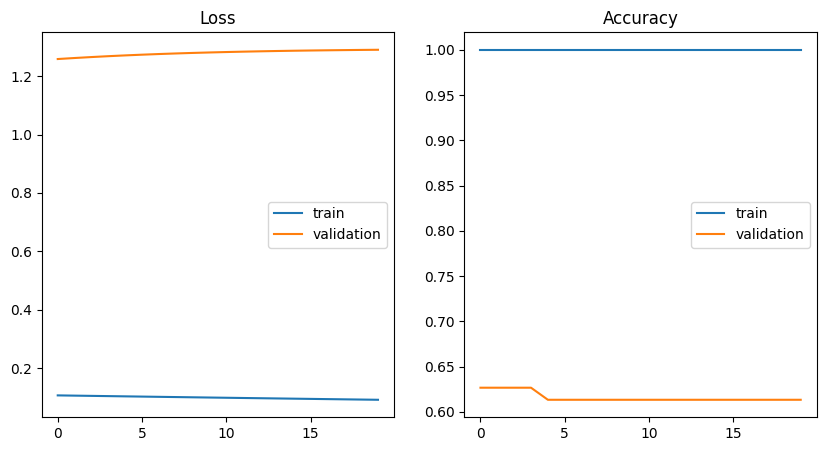

In [13]:
reg_model_results = model_with_regularization.fit(
    x = X_train,
    y = y_train,
    epochs = 20,
    validation_split = 0.4,
    verbose = 0,
    shuffle = False,
    batch_size = None

)

plot_loss_and_accuracy(reg_model_results)
